# EDA on Crop Dataset

Sequence of points to be covered:
1. Import required library
2. Loading data into dataframe
3. Checking type of data (No need)
4. Dropping irrelevant columns (No need)
5. Rename the columns (No need)
6. Dropping the duplicate rows
7. Managing missing or null values
8. Detecting outliers
9. Plotting graphs
10. Create a basic ML model

In [262]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [263]:
df = pd.read_csv("../datasets/crop.csv")

In [264]:
df.head()

,90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,1,91.74
0,85,58,41,21.770462,80.319644,7.038096,226.655537,1,91.59
1,60,55,44,23.004459,82.320763,7.840207,263.964248,1,91.87
2,74,35,40,26.491096,80.158363,6.980401,242.864034,1,88.95
3,78,42,42,20.130175,81.604873,7.628473,262.717340,1,89.71
4,69,37,42,23.058049,83.370118,7.073454,251.055000,1,89.69


In [265]:
df.tail()

,90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,1,91.74
2194,107,34,32,26.774637,66.413269,6.780064,177.774507,21,119.20
2195,99,15,27,27.417112,56.636362,6.086922,127.924610,21,120.24
2196,118,33,30,24.131797,67.225123,6.362608,173.322839,21,114.80
2197,117,32,34,26.272418,52.127394,6.758793,127.175293,21,112.70
2198,104,18,30,23.603016,60.396475,6.779833,140.937041,21,113.20


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   90           2199 non-null   int64  
 1   42           2199 non-null   int64  
 2   43           2199 non-null   int64  
 3   20.87974371  2199 non-null   float64
 4   82.00274423  2199 non-null   float64
 5   6.502985292  2199 non-null   float64
 6   202.9355362  2199 non-null   float64
 7   1            2199 non-null   int64  
 8   91.74        2199 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 154.7 KB


In [267]:
# fix spaces in columns names 
df.columns = df.columns.str.strip()
df.columns 

Index(['90', '42', '43', '20.87974371', '82.00274423', '6.502985292',
       '202.9355362', '1', '91.74'],
      dtype='object')

In [268]:
# dropping duplicates 
df.duplicated().sum()

0

In [269]:
df[df.duplicated()]

,90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,1,91.74


In [270]:
# managing missing or null values
df.isnull().sum()

90             0
42             0
43             0
20.87974371    0
82.00274423    0
6.502985292    0
202.9355362    0
1              0
91.74          0
dtype: int64

In [271]:
df.shape

(2199, 9)

In [272]:
df.columns

Index(['90', '42', '43', '20.87974371', '82.00274423', '6.502985292',
       '202.9355362', '1', '91.74'],
      dtype='object')

In [273]:
x = df.iloc[:,:-1]
x.head()

,90,42,43,20.87974371,82.00274423,6.502985292,202.9355362,1
0,85,58,41,21.770462,80.319644,7.038096,226.655537,1
1,60,55,44,23.004459,82.320763,7.840207,263.964248,1
2,74,35,40,26.491096,80.158363,6.980401,242.864034,1
3,78,42,42,20.130175,81.604873,7.628473,262.717340,1
4,69,37,42,23.058049,83.370118,7.073454,251.055000,1


In [274]:
y = df.iloc[:,-1]
y.head()

0    91.59
1    91.87
2    88.95
3    89.71
4    89.69
Name: 91.74, dtype: float64

In [276]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [277]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=47)

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [280]:
model.fit(xtrain,ytrain)

LinearRegression()

In [302]:
ypred = model.predict(xtest)

plt.scatter(ytest, ypred)

In [303]:
residuals = ytest - ypred

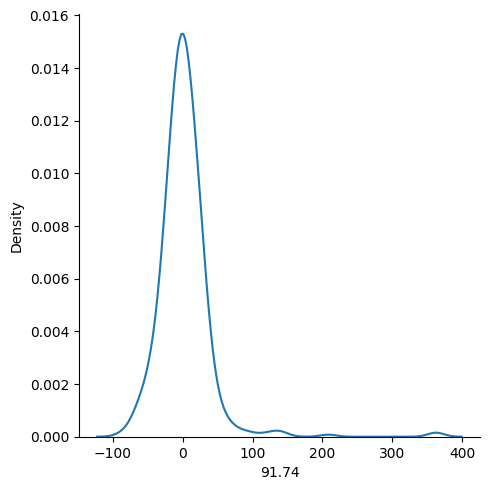

In [284]:
sns.displot(residuals, kind = 'kde')

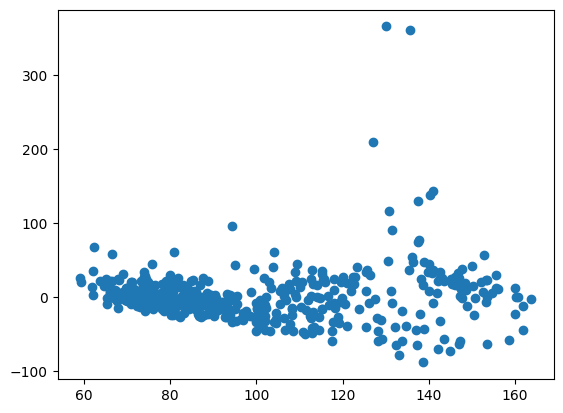

In [285]:
plt.scatter(ypred, residuals)


In [288]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [289]:
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=0)

In [291]:
ypred = model.predict(xtest)

In [293]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(ypred,ytest)
mse

1280.5431257500227

In [295]:
mae = mean_absolute_error(ypred,ytest)
mae

18.1459075

In [297]:
r2_score = r2_score(ypred,ytest)
r2_score

0.011431644828842069

In [301]:
import pickle
pickle.dump(scaler, open('../models/scaler.pkl','wb'))
pickle.dump(model, open('../models/Model.pkl','wb'))